<a href="https://colab.research.google.com/github/DDoeuiGongju/DoItDeeplearning/blob/main/03_%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 limport numpy as np
print(np.__version__)

1.18.5


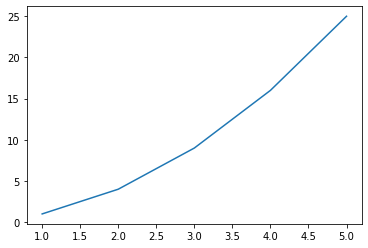

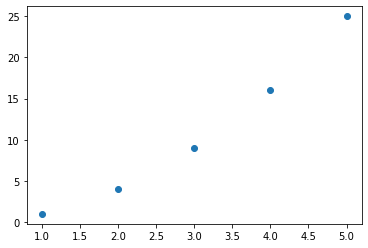

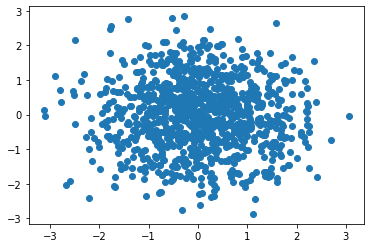

In [ ]:
import matplotlib.pyplot as plt


plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()

plt.scatter([1,2,3,4,5], [1,4,9,16,25])
plt.show()

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

### 선형회귀
> - 선형회귀문제: 각 점을 대표하는 함수(선형회귀로 찾은 모델)를 찾는 문제. 즉, 입력데이터와 타깃데이터를 이용해 절편과 기울기를 찾는 문제.  
  - y=ax+b (x=입력데이터 y=타깃데이터 a=기울기 b=절편)
  - 찾은 함수를 통해 새로운 점의 x좌표(입력값)가 ~라면 y좌표(예측값)는 ~일 것이다라는 예측 가능해짐




## **당뇨병 환자의 1년 후 병의 진전 정도 예측하는 모델**

입력데이타 크기: (442, 10)    타겟데이타 크기: (442,)


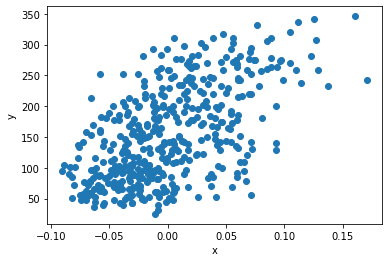

In [ ]:
# 사이킷런에서 당뇨병환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# 입력데이터와 타겟데이터의 크기 확인 => (442, 10) (442, )
# 442명(sample)의 10가지 특성(feature) 
print('입력데이타 크기: {}    타겟데이타 크기: {}'.format(diabetes.data.shape, diabetes.target.shape))

# 데이터 시각화하기
# 3차원 이상의 그래프는 그릴 수 없으므로 3번째 특성만 사용
# 그래프를 통해 3번쟤 특성과 타깃데이터는 정비례관꼐가 있음을 알 수 있음
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 훈련데이터 준비하기
x = diabetes.data[:, 2]
y = diabetes.target

### 경사하강법
> 선형회귀의 방법 중 하나. 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용해 모델을 조금씩 조정하는 최적화 알고리즘
- y=ax+b → yhat=wx+b (yhat=예측값 w=가중치, w와 b는 알고리즘이 찾은 규칙이고 yhat은 우리가 예측한 예측값)  


**예측값으로 올바른 모델 찾기**(훈련데이터에 잘 맞는 w와 b찾기)
1. 무작위로 w와 b를 정한다.  
  → 무작위 모델 만들기
2. x에서 샘플 하나를 선택해 yhat을 계산한다.  
  → 무작위로 모델 예측하기
3. yhat과 선택한 샘플의 진짜 y를 비교한다.  
  → 예측한 값과 진짜 모델 비교하기
4. yhat이 y와 더 가까워지도록 w와 b를 조정한다.  
  → 모델 조정하기
5. 모든 샘플을 처리할 때까지 다시 2~4 항목을 반복한다.



In [ ]:
# 훈련데이터에 맞는 w와 b 찾아보기

# 1. w와 b 초기화
w = 1.0
b = 1.0

# 2. 훈련데이터의 첫 번째 샘플데이터로 yhat얻기
y_hat = x[0] * w + b
print('y_hat:',y_hat)

# 3. 타깃과 예측데이터 비교하기
print('y: ', y[0])

# 4. w값을 조절해 예측값 바꾸기
w_inc = w + 0.1  # 기울기 0.1증가
y_hat_inc = x[0] * w_inc + b
print('w 0.1 증가한 y_hat: ', y_hat_inc)

# 5. w값 조정 후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print('w값 조정 후 예측값 변화율: ', w_rate)  #w_rate = x[0]


# 변화율로 가중치 업데이트하기
# 변화율이 양수일 때 가중치를 업데이트 하는 법: 변화율을 w에 더한다.
# 변화율이 음수일 때 가중치를 업데이트 하는 법: 변화율을 w에 더한다.
w_new = w + w_rate
print('가중치(w) 업데이트: ', w_new)

# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print('b값 조정 후 예측값 변화율: ', b_rate)   # b_rate = 1 

b_new = b + 1
print('절편(b) 업데이트: ', b_new)

y_hat: 1.0616962065186886
y:  151.0
w 0.1 증가한 y_hat:  1.0678658271705574
w값 조정 후 예측값 변화율:  0.061696206518688734
가중치(w) 업데이트:  1.0616962065186888
b값 조정 후 예측값 변화율:  1.0
절편(b) 업데이트:  2.0


이러한 방법은 
- y_hat이 y에 한참 못 미쳐도 w와 b를 더 큰 폭으로 수정할 수 없다.
- y_hat이 y보다 커지면 y_hat을 감소시킬 수 없다.

→ w와 b를 더 능동적으로 업데이트하기 위해 **오차 역전파**를 사용한다.
### 오차 역전파


> y_hat과 y의 차이를 이용해 w와 b를 업데이트 한다. 오차가 연이어 전파된다.



In [ ]:
# y_hat과 y의 오차 양을 변화율에 곱하는 방법으로 w를 업데이트
err = y[0] - y_hat
w_new = w + (w_rate * err)
b_new = b + (1 * err)   # b_rate = 1
print('가중치 업데이트: {}, 절편 업데이트: {}'.format(w_new, b_new))   # 큰 폭으로 바뀐것을 알 수 있다.

가중치 업데이트: 10.250624555904514, 절편 업데이트: 150.9383037934813


전체 샘플을 통해 얻은 가중치와 절편: 898.6166629246662 122.2910639663966


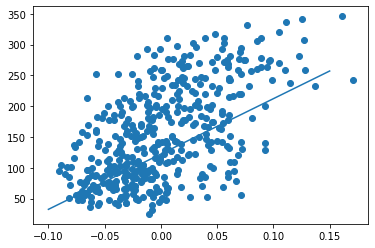

100번의 epoch을 반복해 얻은 가중치와 절편: 913.5973364345905 123.39414383177204


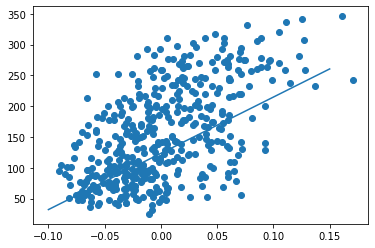

In [ ]:
# 이러한 방식을 전체 샘플에 적용한다.
for x_i, y_i in zip(x, y):   # zip(): 여러 개 배열에서 동시에 요소를 하나씩 꺼내줌
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate*err
  b = b + 1*err
print('전체 샘플을 통해 얻은 가중치와 절편:', w, b)

# 모델이 전체 데이터셋을 잘 표현하는지 그래프를 통해 알아보기
# 그래프 시작점과 종료점의 x좌표와 y좌표를 plot()함수에 전달
# x좌표 2개를 -0.1과 0.15로 지정
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()



# 경사하강법에서는 주어진 훈련 데이터로 학습 여러번 반복
# Epoch: 전체 훈련 데이터를 모두 이용해 한 단위의 작업을 진행하는 것 
# 100번의 에폭 반복
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1*err
print('100번의 epoch을 반복해 얻은 가중치와 절편:', w, b)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

예측값: 287.8416643899983


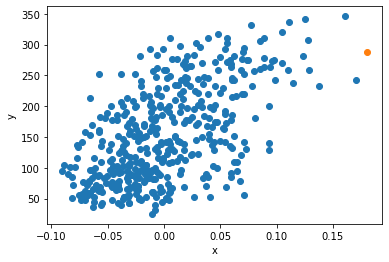

In [ ]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print('예측값:', y_pred)

plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

※ 정리
1. w와 b를 임의의 값으로 초기화하고 훈련데이터의 샘플을 하나씩 대입해 y와 y_hat의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용해 w와 b를 업데이트 한다.
3. 만약 y_hat이 y보다 커지면 오차는 음수가 되어 자동으로 w와 b가 줄어들도록 업데이트된다.
4. 반대로 y_hat이 y보다 작아지면 오차는 양수가 되고 w와 b가 커지도록 업데이트된다.

### 손실 함수와 경사 하강법

> - 경사 하강법: 어떤 손실 함수가 정의됐을 때 손실 함수의 값이 최소가 되는 지점을 찾아가는 방법
- 손실 함수(Loss function): 예상 값과 실제 타깃값의 차이를 함수로 정의한 것  
  - 제곱 오차(Squared error): 타깃값과 예측값을 뺀 다음 제곱한 값. 제곱오차가 최소가 되면 산점도 그래프를 가장 잘 표현한 직선이 그려진다다. 최솟값을 알아내려면 기울기에 따라 함수의 값이 낮은 쪽으로 이동해야 한다. 기울기를 구하려면 제곱 오차를 가중치나 절편에 대해 미분하면 된다.
      - 가중치 및 절편에서 손실함수의 미분 값을 빼는데 그 이유는 **손실함수의 낮은쪽으로 이동하기 위함**이다.

앞에서 했던 **오차를 변화율에 곱해 가중치와 절편을 업데이트**한 것은 제곱 오차를 미분한 것과 같다.  
손실함수에 대해 일일이 변화율의 값을 계산하는 대신 편미분을 사용해 변화율을 계산한다.

※ 변화율 = gradient라고 부른다.

100번의 epoch을 반복해 얻은 가중치와 절편: 913.5973364345905 123.39414383177204


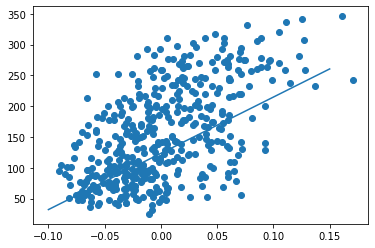

In [ ]:
# 앞에서 만든 경사하강법 알고리즘을 Neuron이라는 이름의 파이썬 클래스로 만들기
class Neuron:
  def __init__(self):
    # 초기화 작업 수행
    self.w = 1.0   # 가중치
    self.b = 1.0   # 절편

  # 정방향 계산 만들기
  def forpass(self, x):
    y_hat = x * self.w + self.b   # 직선의 방정식 계산
    return y_hat

  # 역방향 계산 만들기
  def backprop(self, x, err):
    w_grad = x * err        # 가중치에 대한 gradient 계산
    b_grad = 1 *err         # 절편에 대한 gradient 계산
    return w_grad, b_grad   # 이 값들로 가중치와 절편을 업데이트해 점차 훈련 데이터에 최적화된 가중치와 절편을 얻음
    
  # 훈련을 위한 fit()매서드
  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)                  # 정방향 계산
        err = -(y_i - y_hat)                       # 오차 계산  
        w_grad, b_grad = self.backprop(x_i, err)   # 역방향 계산
        self.w -= w_grad                           # 가중치 업데이트
        self.b -= b_grad                           # 절편 업데이트

# 모델 훈련하기(학습시키기)
neuron = Neuron()
neuron.fit(x, y)
print('100번의 epoch을 반복해 얻은 가중치와 절편:', neuron.w, neuron.b)

# 학습이 완료된 모델의 가중치와 절편 확인하기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()